# TWEET EVENT ANALYZER

    This program helps you analize the trends during an event.  It can generate the following info
        1) how many mentions an event has before, during and after the event 
        2) what's is the general sentiment of the event
        3) who are the best and worst performers
        4) how does the sentiment rise and fall due to different situations, performers, etc. 

In [51]:
try:
    import json
except ImportError:
    import simplejson as json

# Import the tweepy library
import twitter
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import yaml
import numpy as np
import gmaps
import re
from wordcloud import WordCloud

from pandas import Series
from matplotlib.pyplot import figure #para cambiar el tamaño de las gráficas
from scipy.stats import norm



#### The following section will read de CSV file with the info of the event (in this case Ultra Miami 2019).  This info was generated in a separate program


In [2]:
df=pd.read_csv('ultra7.csv')
print(f"The dataframe has {len(df)} tweets to perform the analysis")  

The dataframe has 900 tweets to perform the analysis


#### Clean the Dataframe info

In [3]:
df_clean=df[['created_at','favorite_count','retweet_count','text','user']]
df_clean.head(3)

,created_at,favorite_count,retweet_count,text,user
0,Sun Mar 31 07:05:03 +0000 2019,4826,995,Thank you for an incredible Day 2!\r\n\r\nSee ...,"{'id': 22838300, 'id_str': '22838300', 'name':..."
1,Wed Mar 27 16:23:20 +0000 2019,4135,1017,"MIAMI, ARE YOU READY?\r\n\r\nOnly 2 more days ...","{'id': 22838300, 'id_str': '22838300', 'name':..."
2,Sun Mar 31 15:46:24 +0000 2019,9947,2379,Shaq was turnt up at the #Ultra2019 in Miami! ...,"{'id': 11912362, 'id_str': '11912362', 'name':..."


## SENTIMENT ANALYSIS

### The following code will analyze the text of the tweets and will add values to determine if the tweet has a positive or negative connotation

### To achieve this it will use the TextBlob library

### 1 <-- positive sentiment
### 0  <-- neutral sentiment
### -1 <-- negative sentiment

In [4]:
polarity=[]
subjectivity=[]
sentiment=[]

for tweet in df_clean['text']:
    #print(tweet)
    analysis = TextBlob(tweet)
    #print(analysis.sentiment)
    polarity.append(analysis.sentiment[0])
    subjectivity.append(analysis.sentiment[1])
    if analysis.sentiment[0]>0:
        sentiment.append('Positive')
    elif analysis.sentiment[0]<0:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df_clean["Sentiment"]=sentiment
df_clean["Polarity"]=polarity
df_clean["Subjectivity"]=subjectivity
df_clean.head(5)

C:\Users\danie\Anaconda3\envs\pythonrules\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\danie\Anaconda3\envs\pythonrules\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\danie\Anaconda3\envs\pythonrules\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

,created_at,favorite_count,retweet_count,text,user,Sentiment,Polarity,Subjectivity
0,Sun Mar 31 07:05:03 +0000 2019,4826,995,Thank you for an incredible Day 2!\r\n\r\nSee ...,"{'id': 22838300, 'id_str': '22838300', 'name':...",Positive,0.500000,0.483333
1,Wed Mar 27 16:23:20 +0000 2019,4135,1017,"MIAMI, ARE YOU READY?\r\n\r\nOnly 2 more days ...","{'id': 22838300, 'id_str': '22838300', 'name':...",Positive,0.233333,0.666667
2,Sun Mar 31 15:46:24 +0000 2019,9947,2379,Shaq was turnt up at the #Ultra2019 in Miami! ...,"{'id': 11912362, 'id_str': '11912362', 'name':...",Neutral,0.000000,0.000000
3,Sun Mar 31 23:59:58 +0000 2019,0,67,RT @cosmicgate: The Germans are ready for @ult...,"{'id': 518854087, 'id_str': '518854087', 'name...",Positive,0.250000,0.500000
4,Sun Mar 31 23:59:53 +0000 2019,3,0,Let's go to break it 🔥🔥🔥🔥 @vinivicimusic #ULTR...,"{'id': 978604722562224128, 'id_str': '97860472...",Neutral,0.000000,0.000000


### It's time to start to analyze the dataframe

### This section will give us the general feeling through the event. 

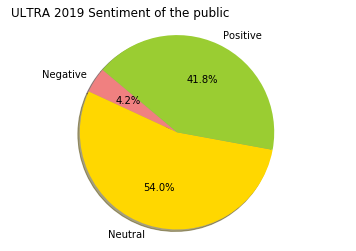

<Figure size 864x648 with 0 Axes>

In [5]:
s=df_clean.groupby('Sentiment').count()
#print(s["created_at"])
labels = 'Negative','Neutral','Positive'
sizes = [s["created_at"][0],s["created_at"][1],s["created_at"][2]]
colors = ['lightcoral', 'gold','yellowgreen' ]
explode = (0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("ULTRA 2019 Sentiment of the public",loc="left")

fig_size = plt.rcParams["figure.figsize"]#to make the graph bigger, in inches  
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.show()
plt.savefig('Ultra2019Sentiment.png')

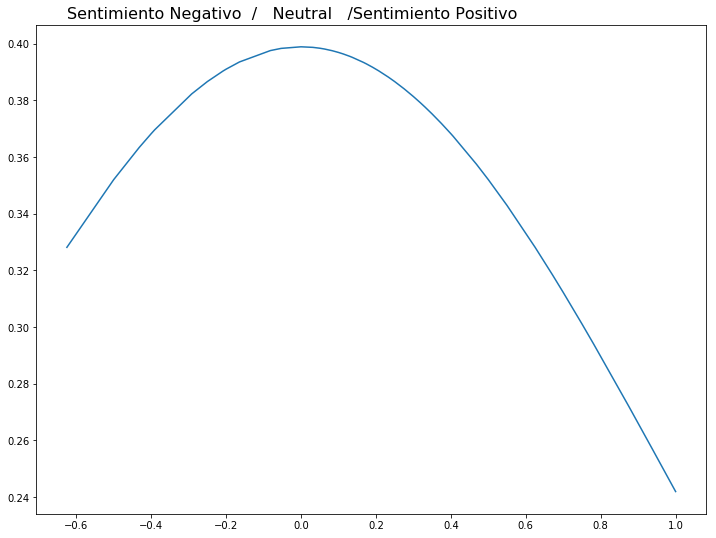

<Figure size 864x648 with 0 Axes>

In [52]:
# Plot between -10 and 10 with .001 steps.
x_axis = df_clean['Polarity'].tolist()
x_axis.sort(reverse = True) 
# Mean = 0, SD = 2.
plt.plot(x_axis, norm.pdf(x_axis,0,1))
plt.title('Sentimiento Negativo  /   Neutral   /Sentimiento Positivo                               ', fontsize=16)
plt.show()
plt.savefig('Ultra2019SentimentCurve.png',dpi=100, bbox_inches = "tight")

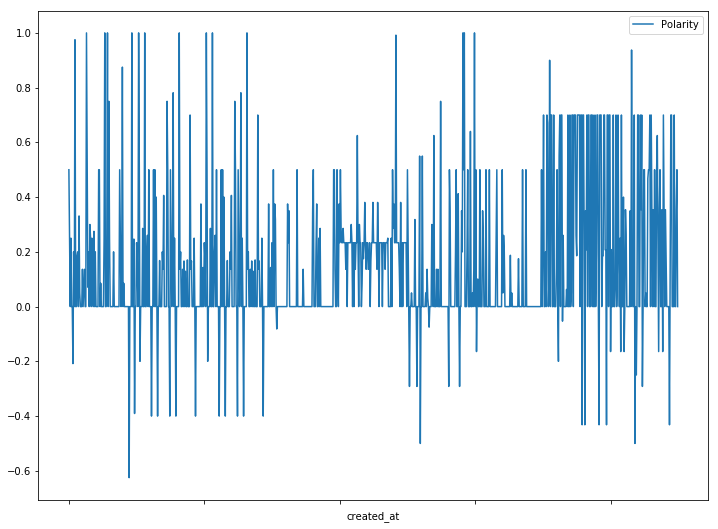

In [6]:
df_clean.plot(x="created_at",y="Polarity")
fig_size = plt.rcParams["figure.figsize"]#to make the graph bigger, in inches  
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [6]:
import time
ts1=[]
for tweet in df_clean['created_at']:
    ts1.append(time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(tweet,'%a %b %d %H:%M:%S +0000 %Y')))
df_clean["time"]=pd.Series(ts1)
df_clean.head(1)

C:\Users\danie\Anaconda3\envs\pythonrules\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,created_at,favorite_count,retweet_count,text,user,Sentiment,Polarity,Subjectivity,time
0,Sun Mar 31 07:05:03 +0000 2019,4826,995,Thank you for an incredible Day 2!\r\n\r\nSee ...,"{'id': 22838300, 'id_str': '22838300', 'name':...",Positive,0.5,0.483333,2019-03-31 07:05:03


In [8]:
df_sort=df_clean.sort_values(by='time')
df_sort=df_sort.reset_index()
df_sort.head(10)


,index,created_at,favorite_count,retweet_count,text,user,Sentiment,Polarity,Subjectivity,time
0,401,Tue Mar 26 16:26:00 +0000 2019,2608,735,3. MORE. DAYS.\r\n\r\n#Ultra2019 https://t.co/...,"{'id': 22838300, 'id_str': '22838300', 'name':...",Positive,0.500000,0.500000,2019-03-26 16:26:00
1,302,Tue Mar 26 16:26:00 +0000 2019,2608,735,3. MORE. DAYS.\r\n\r\n#Ultra2019 https://t.co/...,"{'id': 22838300, 'id_str': '22838300', 'name':...",Positive,0.500000,0.500000,2019-03-26 16:26:00
2,402,Tue Mar 26 19:11:27 +0000 2019,1828,557,You're all invited to the biggest housewarming...,"{'id': 22838300, 'id_str': '22838300', 'name':...",Positive,0.285714,0.535714,2019-03-26 19:11:27
3,300,Wed Mar 27 16:23:20 +0000 2019,4135,1017,"MIAMI, ARE YOU READY?\r\n\r\nOnly 2 more days ...","{'id': 22838300, 'id_str': '22838300', 'name':...",Positive,0.233333,0.666667,2019-03-27 16:23:20
4,200,Wed Mar 27 16:23:20 +0000 2019,4135,1017,"MIAMI, ARE YOU READY?\r\n\r\nOnly 2 more days ...","{'id': 22838300, 'id_str': '22838300', 'name':...",Positive,0.233333,0.666667,2019-03-27 16:23:20
5,100,Wed Mar 27 16:23:20 +0000 2019,4135,1017,"MIAMI, ARE YOU READY?\r\n\r\nOnly 2 more days ...","{'id': 22838300, 'id_str': '22838300', 'name':...",Positive,0.233333,0.666667,2019-03-27 16:23:20
6,400,Wed Mar 27 16:23:20 +0000 2019,4135,1017,"MIAMI, ARE YOU READY?\r\n\r\nOnly 2 more days ...","{'id': 22838300, 'id_str': '22838300', 'name':...",Positive,0.233333,0.666667,2019-03-27 16:23:20
7,501,Wed Mar 27 16:23:20 +0000 2019,4135,1017,"MIAMI, ARE YOU READY?\r\n\r\nOnly 2 more days ...","{'id': 22838300, 'id_str': '22838300', 'name':...",Positive,0.233333,0.666667,2019-03-27 16:23:20
8,1,Wed Mar 27 16:23:20 +0000 2019,4135,1017,"MIAMI, ARE YOU READY?\r\n\r\nOnly 2 more days ...","{'id': 22838300, 'id_str': '22838300', 'name':...",Positive,0.233333,0.666667,2019-03-27 16:23:20
9,499,Wed Mar 27 22:17:25 +0000 2019,0,117,RT @ultra: 🚨🚨99% SOLD OUT🚨🚨\r\n\r\nThis is you...,"{'id': 2507497037, 'id_str': '2507497037', 'na...",Neutral,0.000000,0.066667,2019-03-27 22:17:25


## generaremos una gráfica de como fue cambiando el sentimiento de las publicaciones a través de los días, una semana antes del evento, durante el evento, y después del evento. 

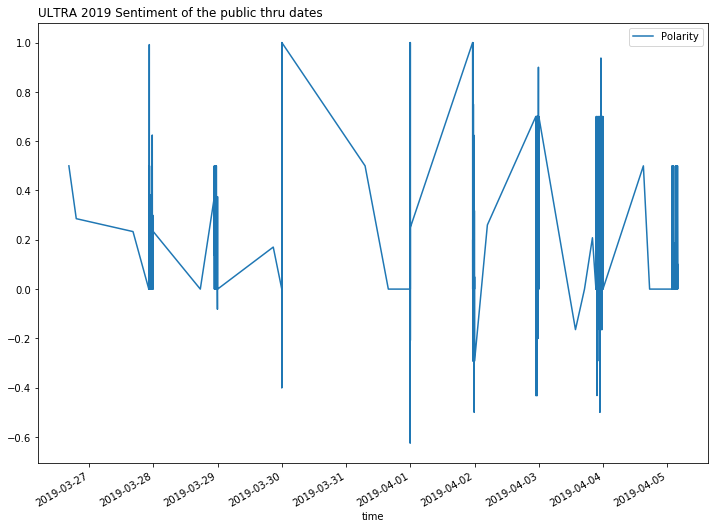

<Figure size 864x648 with 0 Axes>

In [9]:

fig_size = plt.rcParams["figure.figsize"]#to make the graph bigger, in inches  
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
df_sort["time"] = pd.to_datetime(df_sort['time'])
df_sort.plot(x="time", y=["Polarity"])

plt.title("ULTRA 2019 Sentiment of the public thru dates",loc="left")
plt.show()

plt.savefig('Ultra2019SentimentTrueDates.png')

In [10]:
hashtags = []
users_called = []

for entitie in df['entities']:
    try:
        e=yaml.load(entitie)  #YAML IS USED TO CONVERT THE STRING "ENTITIE" INTO A DICTIONARY
        hashtags.append(e['hashtags'])
        users_called.append(e['user_mentions'])
    except:
        pass

In [11]:
hashtags[0]

[{'text': 'Ultra2019', 'indices': [73, 83]}]

## en esta sección vamos a generar un dataframe con los hashtags y las menciones @

In [15]:
unique_hashs = []
hash_all = []
unique_user = []
users_all = []
unique_at = []
for entryhash in hashtags:
    for hashtag in entryhash:
        hash_all.append(hashtag['text'])
        if hashtag['text'] not in unique_hashs:
            unique_hashs.append(hashtag['text'])   

for entryuser in users_called:
    for user in entryuser:
        users_all.append(user['name'])
        if user['name'] not in unique_user:
            unique_user.append(user['name'])
            unique_at.append(user['screen_name'])

hash_count = []
for uhash in unique_hashs:
    hash_count.append(hash_all.count(uhash))

user_count = []
for uuser in unique_user:
    user_count.append(users_all.count(uuser))
    
#check point
print(len(unique_hashs))
print(len(hash_count))

138
138


In [18]:
hashtags_df = pd.DataFrame({'Hashtag': unique_hashs,'Hash Count': hash_count})

mentions_df = pd.DataFrame({'Mentions': unique_user,'Mention Count': user_count, '@Mention': unique_at})
print(len(hashtags_df))
hashtags_df_sort = hashtags_df.sort_values(['Hash Count','Hashtag'], ascending = [0,1])
mentions_df_sort = mentions_df.sort_values(['Mention Count','Mentions'], ascending = [0,1])
hashtags_df_sort.reset_index(drop=True, inplace=True)
hashtags_df_sort.drop(hashtags_df_sort.index[0],inplace=True)  #quita tres primeros elementos que dicen ultra
hashtags_df_sort.drop(hashtags_df_sort.index[0],inplace=True)
hashtags_df_sort.drop(hashtags_df_sort.index[0],inplace=True)
print(len(hashtags_df_sort))

138
135


### En esta sección vamos a eliminar los hashtags que sean nada más de una mención

In [19]:
hashtags_df_sort.rename(columns={"Hash Count":"HashCount"},inplace=True)
#hashtags_df_sort["HashCount"]=1
hash_clean=hashtags_df_sort[hashtags_df_sort.HashCount != 1]
hash_clean.reset_index(inplace=True)
hash_clean.rename(columns={"HashCount":"Hash Count"},inplace=True)
hash_clean.head(1)  

C:\Users\danie\Anaconda3\envs\pythonrules\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,index,Hashtag,Hash Count
0,3,ASOTMIA,24


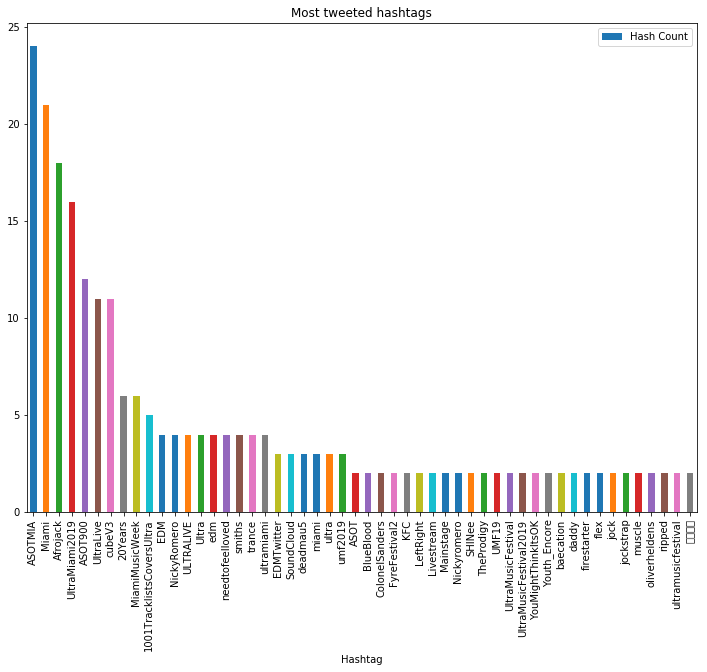

In [20]:
from matplotlib.pyplot import figure
fig_size = plt.rcParams["figure.figsize"]#to make the graph bigger, in inches  
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
ax = hash_clean.plot.bar(x='Hashtag', y='Hash Count', rot=90, title="Most tweeted hashtags")
plt.savefig('Ultra2019MostTweetedHashtags.png')

In [18]:
mentions_df.head()

,Mentions,Mention Count,@Mention
0,SHAQ,26,SHAQ
1,Cosmic Gate,17,cosmicgate
2,Ultra Music Festival,390,ultra
3,A State of Trance,46,asot
4,Vini Vici,27,vinivicimusic


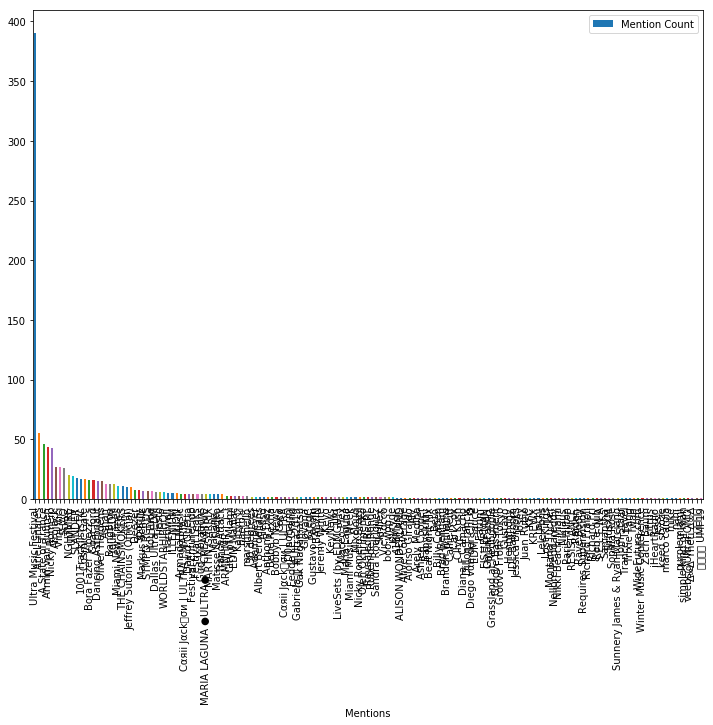

In [21]:
ax = mentions_df_sort.plot.bar(x='Mentions', y='Mention Count', rot=90)

### En esta sección vamos a eliminar los hashtags que sean nada más de una mención

In [24]:
hashtags_df_sort.rename(columns={"Hash Count":"HashCount"},inplace=True)
#hashtags_df_sort["HashCount"]=1
hash_clean=hashtags_df_sort[hashtags_df_sort.HashCount != 1]
hash_clean.reset_index(inplace=True)
hash_clean.rename(columns={"HashCount":"Hash Count"},inplace=True)
hash_clean.head(1)  

,index,Hashtag,Hash Count
0,3,ASOTMIA,24


In [26]:
#Import DJ's Lineup for Ultra Music Festival 2019 in Miami
df_lineup=pd.read_csv('Ultra2019_lineup.csv')
#Create a list of the Headliners
headliner_list = list(df_lineup['DJ HEADLINERS:']) 
headliner_list = [dj for dj in headliner_list if str(dj) != 'nan'] #Remove 'nan' values on the list
headliner_list = [x.lower() for x in headliner_list]
#Create a list of the Live Headliners 
liveheadliner_list = list(df_lineup['LIVE HEADLINERS:'])
liveheadliner_list = [dj for dj in liveheadliner_list if str(dj) != 'nan']
liveheadliner_list = [x.lower() for x in liveheadliner_list]
#Create a list of the Supporter DJ's
support_list = list(df_lineup['SUPPORT:'])
support_list = [dj for dj in support_list if str(dj) != 'nan']
support_list = [x.lower() for x in support_list]

In [32]:
headliners_in_mentions = []
headliners_count = []
athead_in_mentions = []
livehead_in_mentions = []
livehead_count = []
atlive_in_mentions = []
support_in_mentions = []
support_count = []
atsupport_in_mentions = []
for mention in mentions_df['Mentions']:
    if mention.lower() in headliner_list:
        headliners_in_mentions.append(mention)
        headliners_count.append(mentions_df.loc[mentions_df['Mentions'] == mention , 'Mention Count'].iloc[0])
        athead_in_mentions.append(mentions_df.loc[mentions_df['Mentions'] == mention , '@Mention'].iloc[0])
    elif mention.lower() in liveheadliner_list:
        livehead_in_mentions.append(mention)
        livehead_count.append(mentions_df.loc[mentions_df['Mentions'] == mention , 'Mention Count'].iloc[0])
        atlive_in_mentions.append(mentions_df.loc[mentions_df['Mentions'] == mention , '@Mention'].iloc[0])
    elif mention.lower() in support_list:
        support_in_mentions.append(mention)
        support_count.append(mentions_df.loc[mentions_df['Mentions'] == mention , 'Mention Count'].iloc[0])
        atsupport_in_mentions.append(mentions_df.loc[mentions_df['Mentions'] == mention , '@Mention'].iloc[0])


In [33]:
df_headliners = pd.DataFrame({'Headliner':headliners_in_mentions, 'Headliner Mentions': headliners_count, '@Headliner':athead_in_mentions})
df_livehead = pd.DataFrame({'Live Headliner':livehead_in_mentions, 'Live Headliner Mentions': livehead_count, '@Live Head':atlive_in_mentions})
df_supporter = pd.DataFrame({'Supporter':support_in_mentions, 'Supporter Mentions': support_count, '@Supporter':atsupport_in_mentions})
df_headliners.head()


,Headliner,Headliner Mentions,@Headliner
0,Armin van Buuren,44,arminvanbuuren
1,Gud Vibrations,4,GudVibrations
2,Skrillex,2,Skrillex
3,David Guetta,4,davidguetta
4,marshmello,3,marshmellomusic


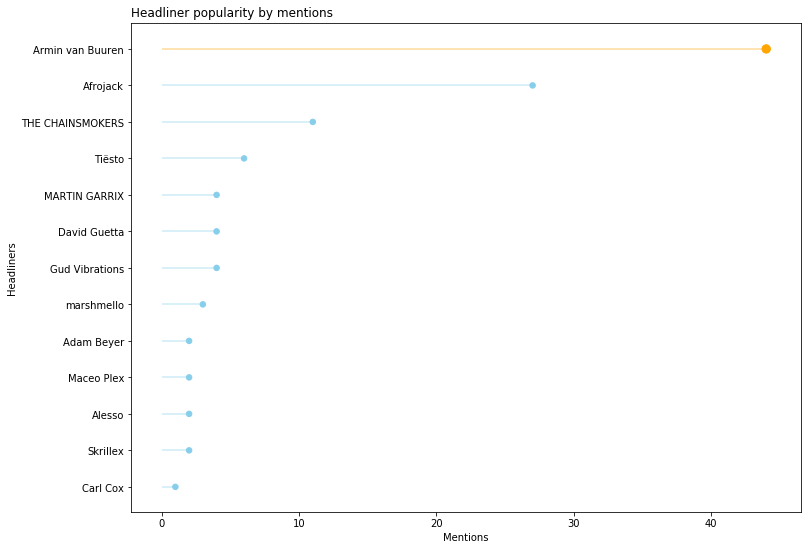

In [34]:
#Headliners Lollipop chart
# Reorder it following the values:
df_headliners_sort = df_headliners.sort_values(by='Headliner Mentions')
my_range=range(1,len(df_headliners.index)+1)
 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
#plt.hlines(y=my_range, xmin=0, xmax=df_headliners_sort['Headliner Mentions'], color='skyblue')
#plt.plot(df_headliners_sort['Headliner Mentions'], my_range, "o")

# Create a color if the group is "Nicky Romero"
my_color=np.where(df_headliners_sort['Headliner']=='Armin van Buuren', 'orange', 'skyblue')
my_size=np.where(df_headliners_sort['Headliner']=='Armin van Buuren', 70, 30)
 
# The vertival plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=df_headliners_sort['Headliner Mentions'], color=my_color, alpha=0.4)
plt.scatter(df_headliners_sort['Headliner Mentions'], my_range, color=my_color, s=my_size, alpha=1)
 
# Add titles and axis names
plt.yticks(my_range, df_headliners_sort['Headliner'])
plt.title("Headliner popularity by mentions", loc='left')
plt.xlabel('Mentions')
plt.ylabel('Headliners')
plt.savefig('Ultra2019MostPopularHeadliner.png')

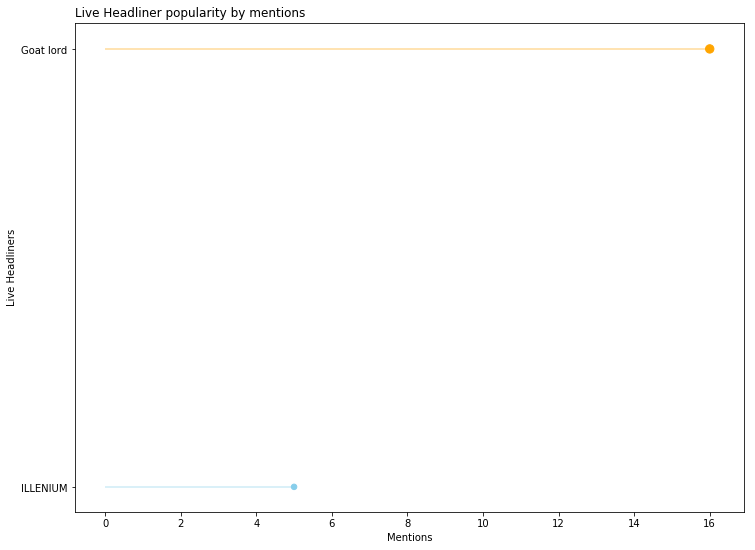

In [35]:
#df_livehead = pd.DataFrame({'Live Headliner':livehead_in_mentions, 'Live Headliner Mentions': livehead_count})
#Live Headliner Lollipop chart
# Reorder it following the values:
df_livehead_sort = df_livehead.sort_values(by='Live Headliner Mentions')
my_range=range(1,len(df_livehead.index)+1)
 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
#plt.hlines(y=my_range, xmin=0, xmax=df_livehead_sort['Live Headliner Mentions'], color='skyblue')
#plt.plot(df_livehead_sort['Live Headliner Mentions'], my_range, "o")
# Create a color if the group is "Nicky Romero"
my_color=np.where(df_livehead_sort['Live Headliner']=='Goat lord', 'orange', 'skyblue')
my_size=np.where(df_livehead_sort['Live Headliner']=='Goat lord', 70, 30)
 
# The vertival plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=df_livehead_sort['Live Headliner Mentions'], color=my_color, alpha=0.4)
plt.scatter(df_livehead_sort['Live Headliner Mentions'], my_range, color=my_color, s=my_size, alpha=1)
 
# Add titles and axis names
plt.yticks(my_range, df_livehead_sort['Live Headliner'])
plt.title("Live Headliner popularity by mentions", loc='left')
plt.xlabel('Mentions')
plt.ylabel('Live Headliners')
plt.savefig('Ultra2019MostPopularLiveHeadliner.png')

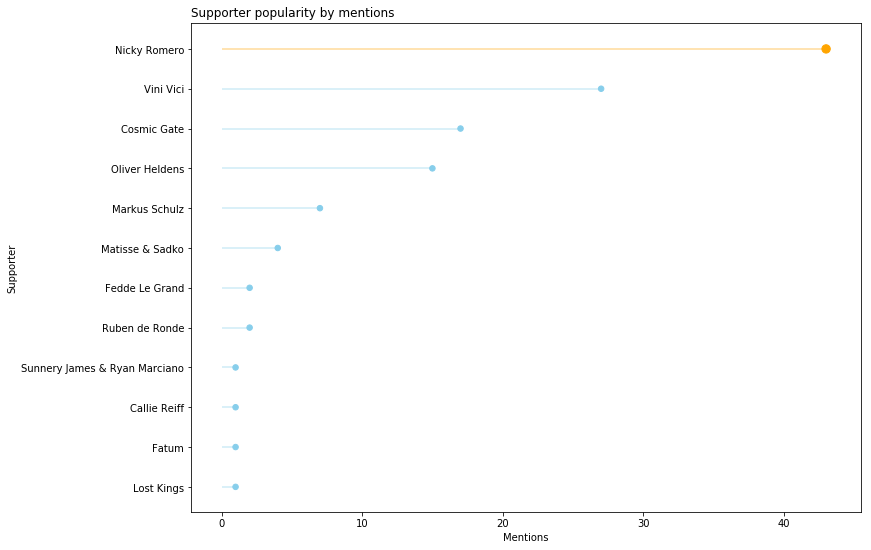

In [36]:
#df_supporter = pd.DataFrame({'Supporter':support_in_mentions, 'Supporter Mentions': support_count})
#Supporters Lollipop chart
# Reorder it following the values:
df_supporter_sort = df_supporter.sort_values(by='Supporter Mentions')
my_range=range(1,len(df_supporter.index)+1)
 
# The vertival plot is made using the hline function
import seaborn as sns
#plt.hlines(y=my_range, xmin=0, xmax=df_supporter_sort['Supporter Mentions'], color='skyblue')
#plt.plot(df_supporter_sort['Supporter Mentions'], my_range, "o")

# Create a color if the group is "Nicky Romero"
my_color=np.where(df_supporter_sort ['Supporter']=='Nicky Romero', 'orange', 'skyblue')
my_size=np.where(df_supporter_sort ['Supporter']=='Nicky Romero', 70, 30)
 
# The vertival plot is made using the hline function
import seaborn as sns
plt.hlines(y=my_range, xmin=0, xmax=df_supporter_sort['Supporter Mentions'], color=my_color, alpha=0.4)
plt.scatter(df_supporter_sort['Supporter Mentions'], my_range, color=my_color, s=my_size, alpha=1)

 
# Add titles and axis names
plt.yticks(my_range, df_supporter_sort['Supporter'])
plt.title("Supporter popularity by mentions", loc='left')
plt.xlabel('Mentions')
plt.ylabel('Supporter')
plt.savefig('Ultra2019MostPopularSupporter.png')

In [37]:
mention_score = []
for mention in df_headliners['@Headliner']:
    aux_index = 0
    aux_sent = 0
    aux_count = 0
    #print(mention)
    for tweet in df_clean['text']:
    
        if tweet.find(mention)>0:
            
            aux_sent = aux_sent + df_clean.iloc[aux_index,6]
            #print(aux_index)      
            aux_count += 1
       
        aux_index += 1 
    try:
        aux_sent = aux_sent/aux_count
        mention_score.append(aux_sent)
    except:
        pass
#print(mention_score)
    #print(tweet)       
df_headliners['Sentiment Score'] = mention_score            
df_headliners        

,Headliner,Headliner Mentions,@Headliner,Sentiment Score
0,Armin van Buuren,44,arminvanbuuren,0.206388
1,Gud Vibrations,4,GudVibrations,0.000000
2,Skrillex,2,Skrillex,0.500000
3,David Guetta,4,davidguetta,0.079545
4,marshmello,3,marshmellomusic,0.116667
5,Tiësto,6,tiesto,0.000000
6,Alesso,2,Alesso,0.083333
7,Afrojack,27,afrojack,0.120202
8,THE CHAINSMOKERS,11,TheChainsmokers,-0.091873
9,MARTIN GARRIX,4,MartinGarrix,-0.002525


In [38]:
users_locations = []

for entitie in df['user']:
    try:
        e=yaml.load(entitie)  #YAML IS USED TO CONVERT THE STRING "ENTITIE" INTO A DICTIONARY
        users_locations.append(e['location'])
       # users_called.append(e['user_mentions'])
    except:
        pass
users_locations = [location for location in users_locations if str(location) != '']


In [53]:
# Dependencies
import requests
import json

# Google developer API key
from config import gkey

formal_locations = []
for location in users_locations:
    try:
        target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
            'address={0}&key={1}').format(location, gkey)
        geo_data = requests.get(target_url).json()
        #json.dumps(geo_data, indent=4, sort_keys=True)
        formal_locations.append(geo_data["results"][0]["formatted_address"])
    except:
        pass

In [30]:
formal_locations_unique = list(dict.fromkeys(formal_locations))
formal_locations_count = []
for location in formal_locations_unique:
    formal_locations_count.append(formal_locations.count(location))

In [31]:
formal_locations_df = pd.DataFrame({'Location': formal_locations_unique,'Location Count': formal_locations_count})

In [32]:
coordenadas = []

for location in formal_locations_unique:
    try:
        target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
            'address={0}&key={1}').format(location, gkey)
        geo_data = requests.get(target_url).json()
        #json.dumps(geo_data, indent=4, sort_keys=True)
        # Extract latitude and longitude
        latlist = (geo_data["results"][0]["geometry"]["location"]["lat"])
        lnglist = (geo_data["results"][0]["geometry"]["location"]["lng"])
        coordenadas.append((latlist,lnglist))
        
    except:
        pass

In [33]:
# Customize the size of the figure
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [34]:
# Assign the marker layer to a variable
markers = gmaps.marker_layer(coordenadas)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [51]:
#Top 10 Locations
formal_locations_df_sort = formal_locations_df.sort_values(['Location Count','Location'], ascending = [0,1])
formal_locations_df_sort = formal_locations_df_sort.reset_index()
top10_locations_df = formal_locations_df_sort.head(10)
top10_locations_df

,index,Location,Location Count
0,0,"Miami, FL, USA",41
1,16,"New York, NY, USA",10
2,38,"Dallas, TX, USA",8
3,20,Mexico,8
4,4,"Bogotá, Bogota, Colombia",7
5,3,"Los Angeles, CA, USA",7
6,34,Kosovo,6
7,49,"Rio de Janeiro, State of Rio de Janeiro, Brazil",6
8,19,United States,6
9,42,"Amsterdam, Netherlands",5


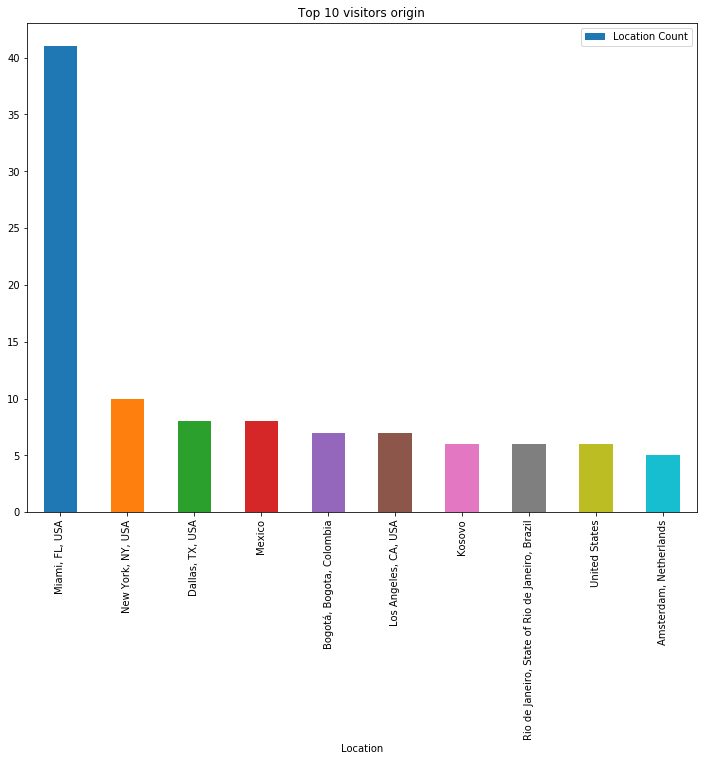

In [52]:
fig_size = plt.rcParams["figure.figsize"]#to make the graph bigger, in inches  
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
ax = top10_locations_df.plot.bar(x='Location', y='Location Count', rot=90, title="Top 10 visitors origin")
plt.savefig('Top10_visitors_origin.png')

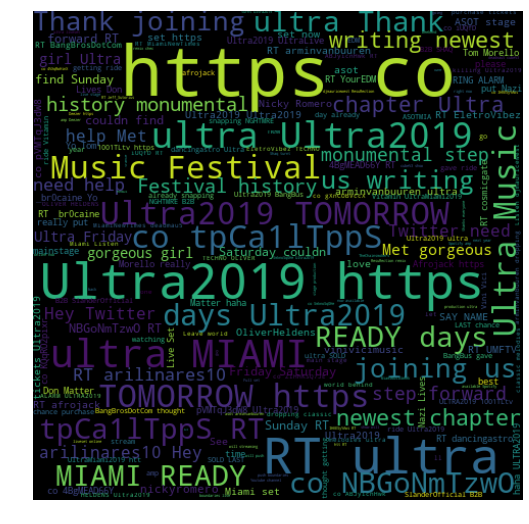

<Figure size 864x648 with 0 Axes>

In [54]:
# Create a list of word
text_list = []

for word in df_sort['text']:
    word_list = re.sub("[^\w]", " ",  word).split()
    for word in word_list:
        text_list.append(word)
    
     
text_string = " ".join(str(x) for x in text_list)
 
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text_string)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
plt.savefig('All_tweets_wordscloud.png')

## let's find the most popular liked tweets, and the most retweeted tweets
#### now let´s sort by number of favorite_count, 

In [44]:
df_clean.head(1)
df_sort_likes = df_clean.sort_values(by=['favorite_count'],ascending=False)
df_sort_likes.reset_index(inplace=True)
df_sort_likes.drop(columns=['index'], axis=1, inplace=True)
len(df_sort_likes)

900

#### first we need to drop the duplicates, and gather the 5 most liked tweets

In [45]:
df_sort_likes.drop_duplicates(subset=["created_at","text"], keep='first', inplace=True)
df_sort_likes.head(5)

,created_at,favorite_count,retweet_count,text,user,Sentiment,Polarity,Subjectivity,time
0,Sun Mar 31 15:46:24 +0000 2019,9947,2379,Shaq was turnt up at the #Ultra2019 in Miami! ...,"{'id': 11912362, 'id_str': '11912362', 'name':...",Neutral,0.000000,0.000000,2019-03-31 15:46:24
2,Sun Mar 31 07:05:03 +0000 2019,4826,995,Thank you for an incredible Day 2!\r\n\r\nSee ...,"{'id': 22838300, 'id_str': '22838300', 'name':...",Positive,0.500000,0.483333,2019-03-31 07:05:03
4,Thu Mar 28 17:31:37 +0000 2019,4441,1418,#Ultra2019 is TOMORROW!! https://t.co/tpCa1lTppS,"{'id': 22838300, 'id_str': '22838300', 'name':...",Neutral,0.000000,0.000000,2019-03-28 17:31:37
7,Wed Mar 27 16:23:20 +0000 2019,4135,1017,"MIAMI, ARE YOU READY?\r\n\r\nOnly 2 more days ...","{'id': 22838300, 'id_str': '22838300', 'name':...",Positive,0.233333,0.666667,2019-03-27 16:23:20
13,Thu Apr 04 17:22:50 +0000 2019,2621,730,Thank YOU for joining us in writing the newest...,"{'id': 22838300, 'id_str': '22838300', 'name':...",Neutral,0.000000,0.000000,2019-04-04 17:22:50


### let's do the same for the retweet count

In [46]:
df_sort_retweet = df_clean.sort_values(by=['retweet_count'],ascending=False)
df_sort_retweet.reset_index(inplace=True)
df_sort_retweet.drop(columns=['index'], axis=1, inplace=True)
len(df_sort_likes)
df_sort_retweet.drop_duplicates(subset=["text"], keep='first', inplace=True)
df_sort_retweet.head(5)

,created_at,favorite_count,retweet_count,text,user,Sentiment,Polarity,Subjectivity,time
0,Sun Mar 31 15:46:24 +0000 2019,9947,2379,Shaq was turnt up at the #Ultra2019 in Miami! ...,"{'id': 11912362, 'id_str': '11912362', 'name':...",Neutral,0.0,0.00,2019-03-31 15:46:24
1,Sun Mar 31 23:59:52 +0000 2019,0,2379,RT @WORLDSTAR: Shaq was turnt up at the #Ultra...,"{'id': 1373523385, 'id_str': '1373523385', 'na...",Neutral,0.0,0.00,2019-03-31 23:59:52
8,Mon Apr 01 23:54:47 +0000 2019,0,1603,RT @BWilliams_38: .@ultra 2019 or Fyre Fest 2....,"{'id': 3050928768, 'id_str': '3050928768', 'na...",Neutral,0.0,1.00,2019-04-01 23:54:47
9,Wed Apr 03 21:56:37 +0000 2019,0,1600,RT @_br0caine: Yo Tom Morello really put up “N...,"{'id': 972545403794132993, 'id_str': '97254540...",Positive,0.2,0.25,2019-04-03 21:56:37
22,Thu Mar 28 23:15:40 +0000 2019,0,1418,RT @ultra: #Ultra2019 is TOMORROW!! https://t....,"{'id': 126310747, 'id_str': '126310747', 'name...",Neutral,0.0,0.00,2019-03-28 23:15:40


### now let's merge both counts


In [47]:
df_retweet_and_liked=df_clean.sort_values(by=['retweet_count'],ascending=False)
df_retweet_and_liked.reset_index(inplace=True)
df_retweet_and_liked.drop(columns=['index'], axis=1, inplace=True)
df_retweet_and_liked.drop_duplicates(subset=["text"], keep='first', inplace=True)
df_retweet_and_liked_clean=df_retweet_and_liked[df_retweet_and_liked.favorite_count != 0]
df_retweet_and_liked_clean.reset_index(inplace=True)

# The most important, favorited, and retweet event in Ultra Miami was: 


In [48]:
df_retweet_and_liked_clean['text'][0]

'Shaq was turnt up at the #Ultra2019 in Miami! 🎶😂🙌 @Shaq https://t.co/4VXqRwHinX'

In [49]:
df_retweet_and_liked_clean10=df_retweet_and_liked_clean.head(10)
df_retweet_and_liked_clean10.sort_values(['favorite_count'],ascending=True, inplace=True)
df_retweet_and_liked_clean10.reset_index(inplace=True)


C:\Users\danie\Anaconda3\envs\pythonrules\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


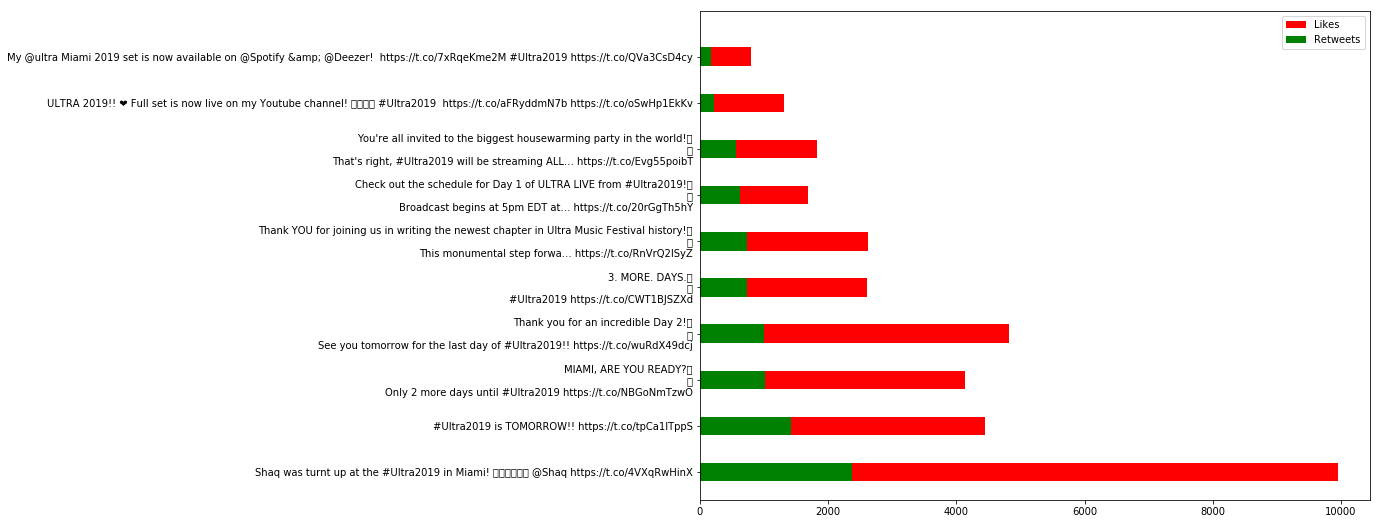

In [50]:
df_retweet_and_liked_clean10=df_retweet_and_liked_clean.head(10)
width = 0.4
fig, ax = plt.subplots()
ax.barh(df_retweet_and_liked_clean10.text, df_retweet_and_liked_clean10.favorite_count, width, color='red', label='Likes')
ax.barh(df_retweet_and_liked_clean10.text, df_retweet_and_liked_clean10.retweet_count, width, color='green', label='Retweets')

ax.set(yticklabels=df_retweet_and_liked_clean10.text, ylim=[width - 1, len(df_retweet_and_liked_clean10)])
ax.legend()

plt.show()
fig.savefig('Ultra2019RetweetsLikes.png',dpi=70, bbox_inches = "tight")